In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Select two classes: Airplane (0) and Automobile (1)
class_1, class_2 = 0, 1

train_mask = (y_train == class_1) | (y_train == class_2)
test_mask = (y_test == class_1) | (y_test == class_2)

x_train, y_train = x_train[train_mask.flatten()], y_train[train_mask.flatten()]
x_test, y_test = x_test[test_mask.flatten()], y_test[test_mask.flatten()]

# Convert labels correctly: Airplane -> -1, Automobile -> +1
y_train = np.where(y_train == class_1, -1, 1).flatten()
y_test = np.where(y_test == class_1, -1, 1).flatten()

# Flatten images (from 32x32x3 to 3072 features)
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# Standardize data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(f"Training samples: {x_train.shape}, Labels: {y_train.shape}")


Training samples: (10000, 3072), Labels: (10000,)


In [ ]:
from sklearn.metrics import accuracy_score
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, epochs=1000):
        self.lr = learning_rate  # Learning rate
        self.lambda_param = lambda_param  # Regularization parameter
        self.epochs = epochs  # Number of training iterations
        self.w = None  # Weights
        self.b = None  # Bias

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)  # Initialize weights
        self.b = 0

        for epoch in range(self.epochs):
            for i, x_i in enumerate(X):
                condition = y[i] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    # Only apply L2 regularization
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Apply gradient update
                    self.w -= self.lr * (2 * self.lambda_param * self.w - x_i * y[i])

                    self.b -= self.lr * y[i]

            # Print loss every 100 epochs
            if epoch % 500 == 0:
               loss = np.mean(np.maximum(0, 1 - y * (np.dot(X, self.w) + self.b)))
               y_pred_train = np.sign(np.dot(X, self.w) + self.b)
               accuracy = accuracy_score(y, y_pred_train)
               print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}")
    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
# Initialize and train SVM model
from sklearn.decomposition import PCA
svm = SVM(learning_rate=0.0001, lambda_param=0.01, epochs=3000)


# Reduce dimensions to 100 components
pca = PCA(n_components=300)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
svm.fit(x_train_pca, y_train)


Epoch 0, Loss: 0.4375, Accuracy: 0.82
Epoch 500, Loss: 26.2283, Accuracy: 0.69
Epoch 1000, Loss: 58.5594, Accuracy: 0.67
Epoch 1500, Loss: 95.3732, Accuracy: 0.65
Epoch 2000, Loss: 135.6426, Accuracy: 0.64
Epoch 2500, Loss: 179.4182, Accuracy: 0.63


In [ ]:
# Make predictions
y_pred = svm.predict(x_test_pca)

# Compute accuracy
accuracy = np.mean(y_pred == y_test) * 100
print(f"SVM Model Accuracy: {accuracy:.2f}%")


SVM Model Accuracy: 62.00%


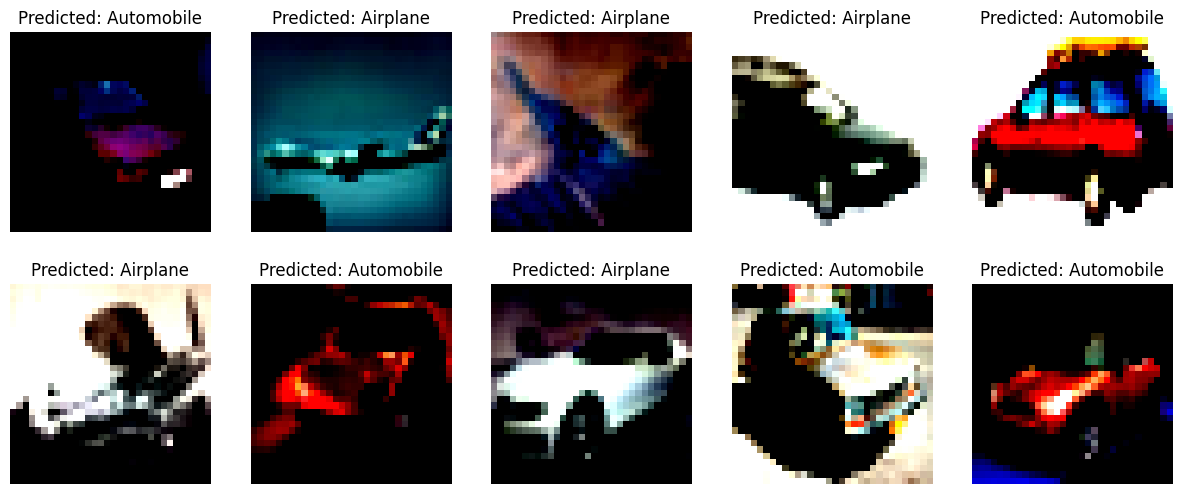

In [ ]:
import random

# Pick 10 random test images
num_images = 10
random_indices = random.sample(range(len(x_test)), num_images)

# Plot results
plt.figure(figsize=(15, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i+1)  # 2 rows, 5 columns
    plt.imshow(x_test[idx].reshape(32, 32, 3))  # Reshape for display
    predicted_label = "Automobile" if y_pred[idx] == 1 else "Airplane"
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")

plt.show()
